Bu defter [Pandas kütüphanesi](https://pandas.pydata.org/pandas-docs/stable/)ni tanıtmayı amaçlıyor

Kaynaklar:
1) https://github.com/justmarkham/pandas-videos/blob/master/pandas.ipynb
2) https://github.com/jseabold/pycon-ds-2018

Cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf 



In [1]:
#Pandas kütüphanesinin yüklenmesi
import pandas as pd
#Çizimler için matplotlib kütüphanesini de yükleyelim
import matplotlib.pyplot as plt

# Veri okuma

Veri kaynağı: https://data.cityofchicago.org

Alttaki örnekte Chicago'daki mekanlarda yapılan sağlığa uygunluk incelemesi verileri okunup inceleniyor. 

Kaynaklar: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5 

[Skipper Seabold - Introduction to Python for Data Science - PyCon 2018](https://www.youtube.com/watch?v=W4WQi2OIy7o)

In [2]:
# data = pd.read_json("https://data.cityofchicago.org/resource/4ijn-s7e5.json")
data = pd.read_csv("https://data.cityofchicago.org/resource/4ijn-s7e5.csv")
# data = pd.read_csv('../veri/4ijn-s7e5.csv')
type(data)

pandas.core.frame.DataFrame

Okuduğumuz veri, Pandas'ın ana veri türlerinden birisi olan DataFrame şeklinde tutuluyor. Verinin içeriğine dair ilk bilgileri edinmek için sıkça kullanılan fonksiyonları sırasıyla işletelim

# Veri özet bilgileri oluşturma ve yorumlama

In [3]:
#Veri boyutlarına bakalım
data.shape

(1000, 17)

1000 satır 17 sürundan oluşan bir tablomuz var. Her satır bir veri örneğinin bilgilerini içeriyor. Kolonlar verinin farklı boyutlarını tanımlıyor

In [4]:
data.columns#kolonlar

Index(['inspection_id', 'dba_name', 'aka_name', 'license_', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [5]:
#Verinin baş kısmına bakalım 
data.head()#benzer şekilde data.tail() son kısmını verecektir

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2584931,SUNDA,SUNDA,2930097,Restaurant,Risk 1 (High),333 N GREEN ST,CHICAGO,IL,60607,2023-11-09T00:00:00.000,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.887808,-87.648545,"(41.887808158349756, -87.64854522138359)"
1,2584936,SUNDA,SUNDA,2930098,Restaurant,Risk 1 (High),333 N GREEN ST,CHICAGO,IL,60607,2023-11-09T00:00:00.000,License,Pass,NaN,41.887808,-87.648545,"(41.887808158349756, -87.64854522138359)"
2,2584899,KING FOOD DRIVE,KING FOOD DRIVE,2841316,Grocery Store,Risk 3 (Low),401 E 69TH ST,CHICAGO,IL,60637,2023-11-08T00:00:00.000,Canvass,Out of Business,NaN,41.769231,-87.615291,"(41.769231013145316, -87.61529069900276)"
3,2584881,AKAHOSHI RAMEN,AKAHOSHI RAMEN,2924580,Restaurant,Risk 3 (Low),2340 N CALIFORNIA AVE,CHICAGO,IL,60647,2023-11-08T00:00:00.000,License Re-Inspection,Pass,NaN,41.924018,-87.697542,"(41.924017757585965, -87.6975423745426)"
4,2584883,"RACHEL'S LEARNING CENTER, LTD.",RACHEL'S LEARNING CENTER,2358596,Children's Services Facility,Risk 1 (High),5242-5244 W NORTH AVE,CHICAGO,IL,60639,2023-11-08T00:00:00.000,License Re-Inspection,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.909591,-87.757404,"(41.90959070094518, -87.75740429414539)"


In [6]:
data.info()#veriye dair genel bilgileri verir, null içeriklerin hangi kolonlarda ve ne kadar olduğunu görmemize yardımcı olur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inspection_id    1000 non-null   int64  
 1   dba_name         1000 non-null   object 
 2   aka_name         996 non-null    object 
 3   license_         1000 non-null   int64  
 4   facility_type    994 non-null    object 
 5   risk             999 non-null    object 
 6   address          1000 non-null   object 
 7   city             999 non-null    object 
 8   state            1000 non-null   object 
 9   zip              1000 non-null   int64  
 10  inspection_date  1000 non-null   object 
 11  inspection_type  1000 non-null   object 
 12  results          1000 non-null   object 
 13  violations       652 non-null    object 
 14  latitude         997 non-null    float64
 15  longitude        997 non-null    float64
 16  location         997 non-null    object 
dtypes: float64(2), 

In [7]:
data.describe()#sayısal verilen içeren kolonlara dair istatistiksel bilgiler verir

,inspection_id,license_,zip,latitude,longitude
count,1.000000e+03,1.000000e+03,1000.000000,997.000000,997.000000
mean,2.584109e+06,2.180467e+06,60628.896000,41.899056,-87.682636
std,3.726189e+02,9.207664e+05,18.716182,0.065958,0.058239
min,2.583251e+06,3.490000e+02,60601.000000,41.649558,-87.914428
25%,2.583791e+06,2.020370e+06,60613.000000,41.866312,-87.715846
50%,2.584094e+06,2.511366e+06,60625.000000,41.900670,-87.668663
75%,2.584382e+06,2.817648e+06,60644.000000,41.939887,-87.638962
max,2.584936e+06,4.053640e+06,60707.000000,42.018079,-87.537327


# Veri içeriğine erişim ve düzenleme işlemleri

Kullanmayacağımız satırları silelim

In [8]:
silinecek_kolonlar = ['latitude','longitude','location']
for kolon in silinecek_kolonlar:
  del data[kolon]

In [9]:
data.shape#boyutu tekrar inceleyelim

(1000, 14)

DataFrame içeriğine erişim için çok çeşitli yöntemler bulunmakta. 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Bunlardan burada örnekleyeceklerimiz:

*   iloc: pozisyon/endeks ile erişim (integer location)
*   loc: etiketle erişim
*   kolonlara erişim




## Pozisyon ile erişim

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label

In [10]:
data.iloc[0]#ilk örnek/satır

inspection_id                                                2584931
dba_name                                                       SUNDA
aka_name                                                       SUNDA
license_                                                     2930097
facility_type                                             Restaurant
risk                                                   Risk 1 (High)
address                                              333 N GREEN ST 
city                                                         CHICAGO
state                                                             IL
zip                                                            60607
inspection_date                              2023-11-09T00:00:00.000
inspection_type                                              License
results                                                         Pass
violations         10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
Name: 0, dtype: object

Tek satır veya tek sütun bir tablo değil dizi/seri verecektir

In [11]:
type(data.iloc[0])

pandas.core.series.Series

In [12]:
data_son2 = data.iloc[-2:]#son iki satır
data_son2

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
998,2583507,"BIG WIG 0003, LLC",BIG WIG TACOS,2703973,Restaurant,Risk 1 (High),2490 N MILWAUKEE AVE,CHICAGO,IL,60647,2023-10-17T00:00:00.000,Canvass,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...
999,2583525,F & K TRADING INC.,TOP MIDDLE EASTERN RESTAURANT,2845330,Restaurant,Risk 1 (High),5750 N CALIFORNIA AVE,CHICAGO,IL,60659,2023-10-17T00:00:00.000,Non-Inspection,No Entry,NaN


Kesip aldığımız kısım da bir tablo olduğu için DataFrame türündedir

In [13]:
type(data_son2)

pandas.core.frame.DataFrame

In [14]:
data.iloc[:3,[2, 5, 11, 12]]#ilk üç satır ve 5,11,12. sütunları ver

,aka_name,risk,inspection_type,results
0,SUNDA,Risk 1 (High),License,Pass
1,SUNDA,Risk 1 (High),License,Pass
2,KING FOOD DRIVE,Risk 3 (Low),Canvass,Out of Business


## Etiket ile erişim, endeks değiştirme

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label

Talolarda edeks olarak verili 0-(N-1) tam sayılar kullanmak zorunda değiliz. Endeksler etiketler olabilir. Örneğin parite ile ilgili bir veride endeksin tarih olması daha kullanışlıdır.


In [16]:
USD_EUR = pd.read_csv("https://gist.githubusercontent.com/cbilson/465257/raw/2a4b761446189caa78204a36af45584149970c50/USD-EUR-csv")
#USD_EUR = pd.read_csv("../veri/USD-EUR.csv")
USD_EUR.head()

,Date,USDEUR
0,2010-07-02,1.2548
1,2010-07-01,1.2328
2,2010-06-30,1.2271
3,2010-06-29,1.2198
4,2010-06-28,1.2339


N.satırdaki parite'den çok belirli bir tarihteki parite erişimi daha pratik olacaktır. Endeks olarak "Date" sütununu belirleyelim

In [17]:
USD_EUR = USD_EUR.set_index('Date')

...ve belirli bir tarihteki değere erişelim

In [18]:
USD_EUR.loc['2010-06-29']

USDEUR    1.2198
Name: 2010-06-29, dtype: float64

Hangi tarihler arasında değerler var? ilk ve sonuncuyu yazdıralım

In [19]:
print("İlk endeks: ", USD_EUR.index[0], ", son endeks: ", USD_EUR.index[-1])

İlk endeks:  2010-07-02 , son endeks:  2010-05-27


Belirli tarihler arasındaki satırları çizidirelim:

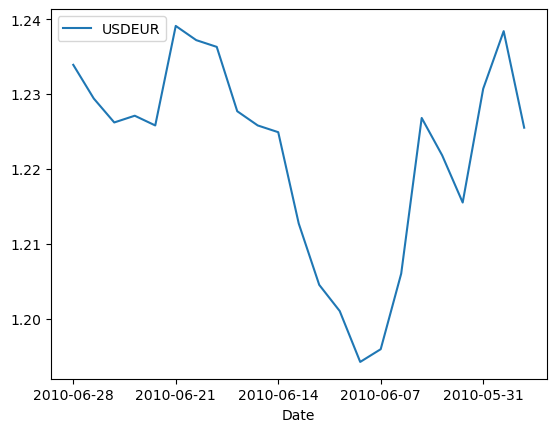

In [20]:
USD_EUR.loc['2010-06-28':'2010-05-27'].plot();

Benzer şekilde, daha önce yüklediğimiz sağlık taraması verisinde endeks olarak ardışık satır sayıları yerine inspection_id'yi kullanmayı isteyebiliriz. Önce hali hazırdaki endekslerin neler olduğuna bakalım

In [21]:
data.index

RangeIndex(start=0, stop=1000, step=1)

inspection_id'nin endeks olarak atanması (kolonlar arasından kaldırılır)

In [22]:
data = data.set_index('inspection_id')
data.index

Int64Index([2584931, 2584936, 2584899, 2584881, 2584883, 2584905, 2584845,
            2584890, 2584849, 2584880,
            ...
            2583517, 2583504, 2583526, 2583455, 2583497, 2583530, 2583523,
            2583483, 2583507, 2583525],
           dtype='int64', name='inspection_id', length=1000)

Yeni sürümün baş kısmına bakalım

In [27]:
data.head(3)

,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
inspection_id,,,,,,,,,,,,,
2584931,SUNDA,SUNDA,2930097,Restaurant,Risk 1 (High),333 N GREEN ST,CHICAGO,IL,60607,2023-11-09T00:00:00.000,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
2584936,SUNDA,SUNDA,2930098,Restaurant,Risk 1 (High),333 N GREEN ST,CHICAGO,IL,60607,2023-11-09T00:00:00.000,License,Pass,NaN
2584899,KING FOOD DRIVE,KING FOOD DRIVE,2841316,Grocery Store,Risk 3 (Low),401 E 69TH ST,CHICAGO,IL,60637,2023-11-08T00:00:00.000,Canvass,Out of Business,NaN


In [30]:
data.loc[2352355]#2352355 inspection_id değerine sahip satırlar: loc -> 'label indexes'

KeyError: 2352355

In [ ]:
data.loc[:2352355]#belirli bir inspection_id'ye kadar olan veriler

In [26]:
data.loc[[2352364, 2352355]]#endeks olarak bir liste de verebiliriz. listenin öğeleri endeksler olarak kullanılır

KeyError: "None of [Int64Index([2352364, 2352355], dtype='int64', name='inspection_id')] are in the [index]"

In [25]:
data.loc[:2352355,['aka_name','facility_type']]#inspection_id 2304061'e kadar olan 'aka_name' ve 'facility_type' kolonlarını ver

KeyError: 2352355

## Kolonlara erişim

data.{kolon} veya data[{kolon}]
Sağlık taramasından geçen yerlerin isimlerine erişelim

In [31]:
mekan_isimleri = data["aka_name"] 
#Alternatif: mekan_isimleri = data.aka_name

In [32]:
type(mekan_isimleri)

pandas.core.series.Series

In [33]:
mekan_isimleri.head()

inspection_id
2584931                       SUNDA
2584936                       SUNDA
2584899             KING FOOD DRIVE
2584881              AKAHOSHI RAMEN
2584883    RACHEL'S LEARNING CENTER
Name: aka_name, dtype: object

Elimizdeki Pandas.Series'i bir çeşit dizi olarak düşünebiliriz. Örneğin 10. ile 15. elemanlar arasını görelim

In [34]:
mekan_isimleri[10:15]
#data['aka_name'][10:15]

inspection_id
2584884     DAVID JENSON CATERING
2584857         EL HOGAR DEL NINO
2584859    STARBUCKS COFFEE #2949
2584868                   VALEDOR
2584911              YI SHOU DIAN
Name: aka_name, dtype: object

Birden fazla kolon içerecek şekilde erişim

In [35]:
alt_tablo = data[['risk','facility_type']]#tek değer yerine list kullanma
alt_tablo.head()

,risk,facility_type
inspection_id,,
2584931,Risk 1 (High),Restaurant
2584936,Risk 1 (High),Restaurant
2584899,Risk 3 (Low),Grocery Store
2584881,Risk 3 (Low),Restaurant
2584883,Risk 1 (High),Children's Services Facility


## Kolonlar üzerinde yapılan işlemler, kolonlardaki verilerin dağılımlarının görselleştirilmesi

Risklerin belirli kategorilerde olduğu görünüyor, onları kategori türüne dönüştürebiliriz

In [36]:
data.risk = data.risk.astype('category')#tersi için : data.risk = data.risk..astype(str)

Oluşan kategorileri görelim

In [37]:
print(data.risk.cat.categories)
data.dtypes['risk']

Index(['All', 'Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], dtype='object')


CategoricalDtype(categories=['All', 'Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], ordered=False)

In [38]:
data["risk"].describe()#veride risk kolonuna dair genel bilgi alalım

count               999
unique                4
top       Risk 1 (High)
freq                851
Name: risk, dtype: object

In [39]:
data["risk"].value_counts()

Risk 1 (High)      851
Risk 2 (Medium)    103
Risk 3 (Low)        43
All                  2
Name: risk, dtype: int64

<Axes: ylabel='risk'>

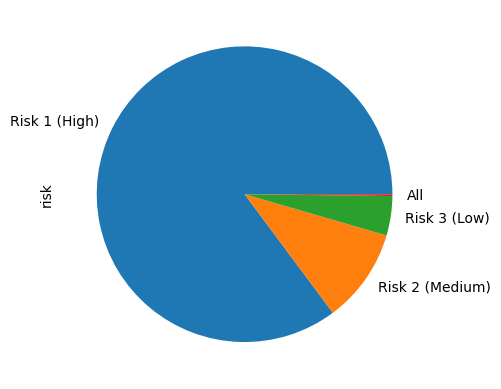

In [40]:
data["risk"].value_counts().plot.pie()

<Axes: >

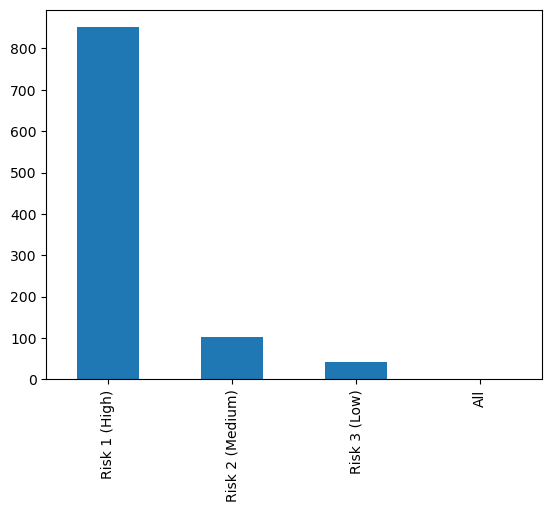

In [41]:
data["risk"].value_counts().plot(kind='bar')

In [42]:
#risk seviyesi "Risk 1 (High)" olarak belirtilmiş olanları görelim
riski_yuksekler = data[data['risk'] == "Risk 1 (High)"]#burada boolean indexing kullanılıyor, bir sonraki hücreye bakınız
riski_yuksekler.head()

,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
inspection_id,,,,,,,,,,,,,
2584931,SUNDA,SUNDA,2930097,Restaurant,Risk 1 (High),333 N GREEN ST,CHICAGO,IL,60607,2023-11-09T00:00:00.000,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
2584936,SUNDA,SUNDA,2930098,Restaurant,Risk 1 (High),333 N GREEN ST,CHICAGO,IL,60607,2023-11-09T00:00:00.000,License,Pass,NaN
2584883,"RACHEL'S LEARNING CENTER, LTD.",RACHEL'S LEARNING CENTER,2358596,Children's Services Facility,Risk 1 (High),5242-5244 W NORTH AVE,CHICAGO,IL,60639,2023-11-08T00:00:00.000,License Re-Inspection,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...
2584905,SUSHI BY BOU,SUSHI BY BOU,2867873,Restaurant,Risk 1 (High),311-319 N MORGAN ST,CHICAGO,IL,60607,2023-11-08T00:00:00.000,Canvass,Pass,NaN
2584845,BANQUETES LA GLORIA 47TH ST,BANQUETES LA GLORIA 47TH ST,22971,Restaurant,Risk 1 (High),4152-4158 W 47TH ST,CHICAGO,IL,60632,2023-11-08T00:00:00.000,Canvass Re-Inspection,Pass,NaN


Karşılaştırma işleminin çıktısının içeriğini inceleyelim

In [0]:
temp = data['risk'] == "Risk 1 (High)"
temp.head()

inspection_id
2352364    False
2352336     True
2352355    False
2352380    False
2352326     True
Name: risk, dtype: bool

In [0]:
#risk kategorik verisini, kategorileri sıralı olacak şekilde değiştirelim
data["risk"].cat.as_ordered(inplace = True)#inplace: dataframe'in kendisini değiştir
print("min:",data["risk"].min(),", max:",data["risk"].max())

min: All , max: Risk 3 (Low)


Benzer şekilde facility_type içerisindeki olası kategorileri görelim

In [0]:
data.facility_type = data.facility_type.astype('category')
data.dtypes['facility_type']

CategoricalDtype(categories=['15 monts to 5 years old', 'BANQUET', 'BREWERY',
                  'BUTCHER SHOP', 'Bakery', 'COFFEE SHOP',
                  'CUSTOM POULTRY SLAUGHTER', 'Catering',
                  'Children's Services Facility', 'Daycare (2 - 6 Years)',
                  'Daycare (2 Years)', 'Daycare (Under 2 Years)',
                  'Daycare Above and Under 2 Years', 'Daycare Combo 1586',
                  'GAS STATION/GROCERY', 'GROCERY STORE', 'Grocery Store',
                  'HAIR SALON', 'HERBALIFE', 'HERBALIFE/ZUMBA', 'HOSTEL',
                  'Hospital', 'ICE CREAM', 'LIQUOR STORE', 'LIVE POULTRY',
                  'Liquor', 'Long Term Care', 'MOBILE FOOD',
                  'Mobile Food Preparer', 'PALETERIA',
                  'Pop-Up Food Establishment User-Tier II', 'REHAB CENTER',
                  'Restaurant', 'SCHOOL', 'STORE', 'School', 'Shared Kitchen',
                  'TAVERN', 'VENDING COMMISSARY', 'tavern'],
                 ordered=False)

In [0]:
#String işlemleri kullanmak istiyorsak str olarak tutmak daha iyi: kategorik veriyi tekrar string haline getirelim
data.facility_type = data.facility_type.astype(str)
#facility_type içinde "CENTER" geçenleri bulalım
data[data.facility_type.str.contains("CENTER")]

,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
inspection_id,,,,,,,,,,,,,
2352252,CLARK CATERING,CLARK CATERING,2574531,REHAB CENTER,Risk 1 (High),124 N Sangamon ST,CHICAGO,IL,60607,2019-11-25T00:00:00.000,Canvass,Fail,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...


Yukarıdaki örnekte gördüğümüz gibi pandas.series verilerine .str fonksiyonları uygulanabiliyor

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

Belirli bir kolondaki değerleri formatlama

"inspection_date" kolonundaki verileri zaman verisi türüne dönüştürelim. Önce hali hazırdaki türünü görelim

In [0]:
data.dtypes[['inspection_date']]

inspection_date    object
dtype: object

In [0]:
data.inspection_date = data.inspection_date.apply(pd.to_datetime)#pandas datetime formatına dönüştürme
data.loc[:2352355,['inspection_date']]

,inspection_date
inspection_id,
2352364,2019-11-26
2352336,2019-11-26
2352355,2019-11-26


In [0]:
data.dtypes[['inspection_date']]

inspection_date    datetime64[ns]
dtype: object

İstersek verileri tarihine göre sıraya dizebiliriz

In [0]:
data.sort_values(by = 'inspection_date')

,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
inspection_id,,,,,,,,,,,,,
2320633,K R M #1 INC,DUNKIN DONUT,29735,Restaurant,Risk 2 (Medium),6254 N WESTERN AVE,CHICAGO,IL,60659,2019-10-28,Canvass,Out of Business,NaN
2320627,ARMOCA DESI GRILL,ARMOCA DESI GRILL,2698565,nan,Risk 1 (High),560 W VAN BUREN ST,CHICAGO,IL,60607,2019-10-28,License,Not Ready,NaN
2320592,INTERNATIONAL FOODS NW INC,INTERNATIONAL FOODS,1129,Grocery Store,Risk 2 (Medium),4404 W FULLERTON AVE,CHICAGO,IL,60639,2019-10-28,Complaint,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
2320574,SYMPHONY MIDWAY,SYMPHONY MIDWAY,2447171,Long Term Care,Risk 1 (High),4437 S CICERO AVE,CHICAGO,IL,60632,2019-10-28,Complaint Re-Inspection,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...
2320630,DELI KING,DELI KING,2073619,Restaurant,Risk 1 (High),410 W 71ST ST,CHICAGO,IL,60621,2019-10-28,Canvass Re-Inspection,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352327,NEMA CHICAGO,NEMA CHICAGO,2621254,TAVERN,Risk 3 (Low),1200 S INDIANA AVE,CHICAGO,IL,60605,2019-11-26,License Re-Inspection,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...
2352396,4 BROTHERS DISCOUNT STORE,4 BROTHERS DISCOUNT,2373912,Grocery Store,Risk 3 (Low),8238 S RACINE AVE,CHICAGO,IL,60620,2019-11-26,Canvass,Out of Business,NaN
2352343,THE LEARNING EXPERIENCE,THE LEARNING EXPERIENCE,2698338,Children's Services Facility,Risk 1 (High),2642 N JONES ST,CHICAGO,IL,60647,2019-11-26,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."


Büyüklüğe göre filtreleme

In [0]:
data[data.inspection_date < '20191115']

,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
inspection_id,,,,,,,,,,,,,
2345638,VEENO,VEENO,2578371,Restaurant,Risk 2 (Medium),2009 S LAFIN ST,CHICAGO,IL,60608,2019-11-14,License Re-Inspection,Pass w/ Conditions,NaN
2345658,KAMEYA RAMEN,KAMEYA RAMEN,2548954,Restaurant,Risk 1 (High),604 W BELMONT AVE,CHICAGO,IL,60657,2019-11-14,Canvass Re-Inspection,Pass w/ Conditions,14. REQUIRED RECORDS AVAILABLE: SHELLSTOCK TAG...
2345601,VELVET TACO,VELVET TACO,2652940,Restaurant,Risk 3 (Low),2309 N LINCOLN AVE,CHICAGO,IL,60614,2019-11-14,License,Fail,NaN
2345580,PLAYAS NAYARITAS 2,PLAYAS NAYARITAS 2,2663557,Restaurant,Risk 3 (Low),6000 W GRAND AVE,CHICAGO,IL,60639,2019-11-14,License,Pass,NaN
2345630,RUNA JAPANESE,RUNA JAPANESE,2283811,Restaurant,Risk 1 (High),2257 W NORTH AVE,CHICAGO,IL,60647,2019-11-14,Canvass,No Entry,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320632,TRASPASADA #2,TRASPASADA #2,1334706,Restaurant,Risk 1 (High),811 N ASHLAND AVE,CHICAGO,IL,60622,2019-10-28,Short Form Complaint,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
2320572,"CHILDREN'S LAND ON BELMONT AVE, INC.","CHILDREN'S LAND ON BELMONT AVE, INC.",2488004,Children's Services Facility,Risk 1 (High),6818 W BELMONT AVE,CHICAGO,IL,60634,2019-10-28,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ..."
2320631,Oromo Cafe,Oromo Cafe,2464339,Restaurant,Risk 1 (High),4703 N Lincoln AVE,CHICAGO,IL,60625,2019-10-28,Complaint,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...


Yüksek riskli olarak işaretlenmiş restoranları bulma

In [0]:
data_restoran = data[data['facility_type'].isin(['Restaurant'])]
data_restoran[data['risk'].isin(['Risk 1 (High)'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations
inspection_id,,,,,,,,,,,,,
2352336,NIA,NIA,1847912,Restaurant,Risk 1 (High),803 W RANDOLPH ST,CHICAGO,IL,60607,2019-11-26,Canvass,No Entry,NaN
2352326,HOOTS ON DIVERSEY,HOOTS ON DIVERSEY,2693975,Restaurant,Risk 1 (High),4059 W DIVERSEY AVE,CHICAGO,IL,60639,2019-11-26,License,Pass,NaN
2352399,EL CAPITAN RESTAURANT,EL CAPITAN RESTAURANT,12453,Restaurant,Risk 1 (High),3754-3758 W ARMITAGE AVE,CHICAGO,IL,60647,2019-11-26,Canvass,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...
2352353,HANDCUT FOODS,HANDCUT FOODS,2320325,Restaurant,Risk 1 (High),1455 W WILLOW ST,CHICAGO,IL,60642,2019-11-26,Canvass,No Entry,NaN
2352335,TAKITO STREET,TAKITO STREET,2658192,Restaurant,Risk 1 (High),2421 - 2423 N LINCOLN AVE,CHICAGO,IL,60614,2019-11-26,License,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320617,LITTLE MEL'S HOT DOG,LITTLE MEL'S HOT DOG,1573071,Restaurant,Risk 1 (High),2205 N CALIFORNIA AVE,CHICAGO,IL,60647,2019-10-28,Canvass,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...
2320585,WICKER PARK SEAFOOD & SUSHI,WICKER PARK SEAFOOD & SUSHI(T1-GATE C01),2594983,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666,2019-10-28,Canvass,Pass w/ Conditions,25. CONSUMER ADVISORY PROVIDED FOR RAW/UNDERCO...
2320632,TRASPASADA #2,TRASPASADA #2,1334706,Restaurant,Risk 1 (High),811 N ASHLAND AVE,CHICAGO,IL,60622,2019-10-28,Short Form Complaint,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."


Veri içerisindeki zip kodunun türü tam sayı olabilir, başa sıfır gelebileceği için string olmasında fayda var

In [0]:
data.dtypes[['zip']]

zip    int64
dtype: object

In [0]:
def sayidanMetin(sayi):#str() ile aynı ancak bir sonraki hücredeki kullanımın açık olması hedeflendiği için tanımlandı
  return str(sayi)

In [0]:
data.zip = data.zip.apply(sayidanMetin)

In [0]:
data.zip[2352355]#inspection_index'i 2300608 olan satırın zip verisi

'60608'

**Kolon ismi değiştirme**

In [0]:
data.rename(columns = {'zip':'posta_kodu'}, inplace = True)
data.columns

Index(['dba_name', 'aka_name', 'license_', 'facility_type', 'risk', 'address',
       'city', 'state', 'posta_kodu', 'inspection_date', 'inspection_type',
       'results', 'violations'],
      dtype='object')

**Kolonu/kolonları silme** (daha önce "del" ile yapmıştık)

In [0]:
data.drop(['posta_kodu','inspection_type'], axis = 1, inplace = True)#axis=1: kolon
data.columns

Index(['dba_name', 'aka_name', 'license_', 'facility_type', 'risk', 'address',
       'city', 'state', 'inspection_date', 'results', 'violations'],
      dtype='object')

**Satır silme**

In [0]:
print("Veri silinmeden önceki boyut: ",data.shape)
data.drop([2352326,2352355], axis = 0, inplace = True)#verilen endekslerdeki iki satırı/veriyi silme, axis = 0: satır
print("Veri silindikten sonraki boyut: ",data.shape)


Veri silinmeden önceki boyut:  (1000, 11)
Veri silindikten sonraki boyut:  (998, 11)


**Önemli kolaylık:** 

Yukarıda yaptığımız işlemlerin büyük kısmını daha dosyayı okurken yapabilirdik

In [0]:
data = pd.read_csv("https://data.cityofchicago.org/resource/4ijn-s7e5.csv", 
                   usecols = ["inspection_id","inspection_date", "inspection_type", "facility_type","risk","zip"],
                   index_col = "inspection_id",
                   parse_dates = ["inspection_date"],
                   converters = {'zip': sayidanMetin},
                   dtype = {
                       "risk" : "category",
                       "facility_type": "category"
                   }
                  )

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2352364 to 2320633
Data columns (total 5 columns):
facility_type      993 non-null category
risk               1000 non-null category
zip                1000 non-null object
inspection_date    1000 non-null datetime64[ns]
inspection_type    1000 non-null object
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 35.0+ KB


In [0]:
#kontrol edelim, zaman kolonunu formatlamış mı?
print(data.inspection_date.dtype)

datetime64[ns]


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2352364 to 2320633
Data columns (total 5 columns):
facility_type      993 non-null category
risk               1000 non-null category
zip                1000 non-null object
inspection_date    1000 non-null datetime64[ns]
inspection_type    1000 non-null object
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 35.0+ KB


# API kullanarak internet üzerinden veri erişimi

[pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/) projesi. İnternet üzerinden veri çeken pandas aracı:

    Yahoo! Finance (deprecated)
    Google Finance
    Enigma
    Quandl
    FRED
    Fama/French
    World Bank
    OECD
    Eurostat
    ...

In [0]:
#OECD verisi okuma örneği
import pandas_datareader as pdr
import datetime
df = pdr.DataReader('TUD', 'oecd', start = datetime.datetime(2000, 1, 1), end = datetime.datetime(2010, 1, 1))
df.head()

Country                Hungary                ...       Germany                     
Source     Administrative data                ...   Survey data                     
Series               Employees Union members  ... Union members Trade union  density
Year                                          ...                                   
2000-01-01                 NaN           NaN  ...           NaN                  NaN
2001-01-01                 NaN           NaN  ...           NaN                  NaN
2002-01-01                 NaN           NaN  ...           NaN                  NaN
2003-01-01                 NaN           NaN  ...           NaN                  NaN
2004-01-01                 NaN           NaN  ...           NaN                  NaN

[5 rows x 216 columns]

# DataFrame içeriğini kodla yaratmak

Dosyalardan okuyabileceğimiz gibi, data-frame'i pandas fonksiyonlarını kullanarak da oluşturabiliriz. 
Kaynaklar:
1) https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [0]:
import numpy as np
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Date-range oluşturma: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html 

In [0]:
#date-range oluşturma
gunler = pd.date_range('20130101', periods = 6)
print(gunler)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


Data-frame oluşturma

In [0]:
df = pd.DataFrame(np.random.randn(6, 4), index = gunler, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,1.175987,-0.158160,-0.454887,2.973799
2013-01-02,0.552653,1.176788,0.709757,1.828756
2013-01-03,-0.359450,-0.510628,1.251382,0.293373
2013-01-04,0.065991,-1.019936,-0.050246,2.025725
2013-01-05,-0.264145,-1.708646,-0.661763,-0.619320
2013-01-06,0.917978,-0.510339,0.660334,0.538003


Belirli bir değerin değiştirilmesi

In [0]:
df.at[gunler[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,-0.158160,-0.454887,2.973799
2013-01-02,0.552653,1.176788,0.709757,1.828756
2013-01-03,-0.359450,-0.510628,1.251382,0.293373
2013-01-04,0.065991,-1.019936,-0.050246,2.025725
2013-01-05,-0.264145,-1.708646,-0.661763,-0.619320
2013-01-06,0.917978,-0.510339,0.660334,0.538003


Parçalara bölme ve birleştirme

In [0]:
parcalar = [df[:2], df[-2:]]
parcalar

[                   A         B         C         D
 2013-01-01  0.000000 -0.158160 -0.454887  2.973799
 2013-01-02  0.552653  1.176788  0.709757  1.828756,
                    A         B         C         D
 2013-01-05 -0.264145 -1.708646 -0.661763 -0.619320
 2013-01-06  0.917978 -0.510339  0.660334  0.538003]

In [0]:
pd.concat(parcalar)

,A,B,C,D
2013-01-01,0.000000,-0.158160,-0.454887,2.973799
2013-01-02,0.552653,1.176788,0.709757,1.828756
2013-01-05,-0.264145,-1.708646,-0.661763,-0.619320
2013-01-06,0.917978,-0.510339,0.660334,0.538003


Belirli bir kolondaki değerler üzerinden tabloları birleştirme

In [0]:
df1 = pd.DataFrame({'isim': ['Ahmet', 'Selin'], 'boy': [1.75, 1.68]})
df2 = pd.DataFrame({'isim': ['Selin', 'Ahmet'], 'yaş': [24, 20]})
df = pd.merge(df1, df2, on = 'isim')
df

,isim,boy,yaş
0,Ahmet,1.75,20
1,Selin,1.68,24


Dosyaya yazma

In [0]:
df.to_csv('test.csv')
df.to_excel('test.xlsx', sheet_name='Sheet1')

# Pandas üzerine kurulan kütüphaneler


https://bamboolib.8080labs.com/